### **TP3**
### Edge Detection

In [ ]:
1.	Charger une image en niveaux de gris.
2.	Afficher l'image.

In [1]:
#installation des packages dans l'environnement Python
!pip install opencv-python matplotlib
import cv2
import matplotlib.pyplot as plt





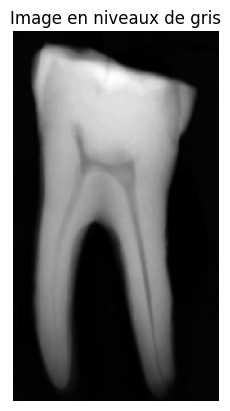

In [13]:
import numpy as np
from PIL import Image

# Charger l'image
chemin_image = '/content/dent.PNG'
image = Image.open(chemin_image)
image_gris = image.convert('L')  # Convertir en niveaux de gris

# Convertir l'image en tableau NumPy
image_array = np.array(image_gris)


# Afficher l'image en niveaux de gris
plt.imshow(image_array, cmap='gray')
plt.title('Image en niveaux de gris')
plt.axis('off')  # Masquer les axes
plt.show()


### SOBEL et PREWITT:
Dans cette partie, nous allons implémenté Sobel et Cannel sans usage de fonction prédéfinies,  pour ceci nous utilisons des filtres.

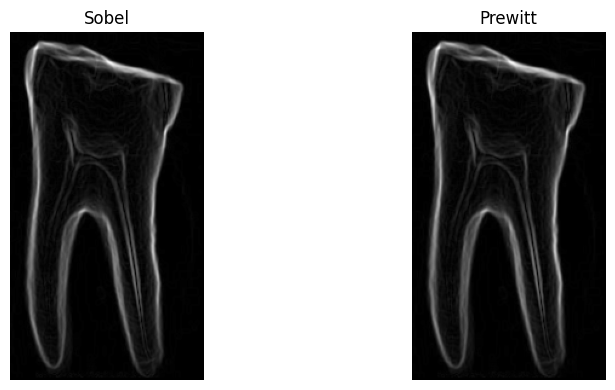

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Charger l'image
chemin_image = '/content/dent.PNG'
image = Image.open(chemin_image)
image_gris = image.convert('L')  # Convertir en niveaux de gris

# Convertir l'image en tableau NumPy
image_array = np.array(image_gris)

# Noyaux Sobel et Prewitt
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

# Fonction pour la convolution 2D
def convolve2d(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output = np.zeros((img_height, img_width))

    for i in range(img_height - kernel_height + 1):
        for j in range(img_width - kernel_width + 1):
            output[i, j] = np.sum(image[i:i + kernel_height, j:j + kernel_width] * kernel)

    return output

# Calcul des gradients pour les opérateurs Sobel et Prewitt
gradient_sobel_x = convolve2d(image_array, sobel_x)
gradient_sobel_y = convolve2d(image_array, sobel_y)
gradient_sobel = np.sqrt(gradient_sobel_x ** 2 + gradient_sobel_y ** 2)

gradient_prewitt_x = convolve2d(image_array, prewitt_x)
gradient_prewitt_y = convolve2d(image_array, prewitt_y)
gradient_prewitt = np.sqrt(gradient_prewitt_x ** 2 + gradient_prewitt_y ** 2)

# Affichage des résultats
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Sobel')
plt.imshow(gradient_sobel, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('Prewitt')
plt.imshow(gradient_prewitt, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### **Changement de seuil pour Prewitt et SObel **



 Ce script traite une image en niveaux de gris en utilisant les opérateurs de détection de contours de Sobel et Prewitt. Il calcule les gradients dans les directions x et y, combine les résultats pour obtenir les gradients de magnitude, puis applique différents seuils pour détecter les contours.                                                                                                                 

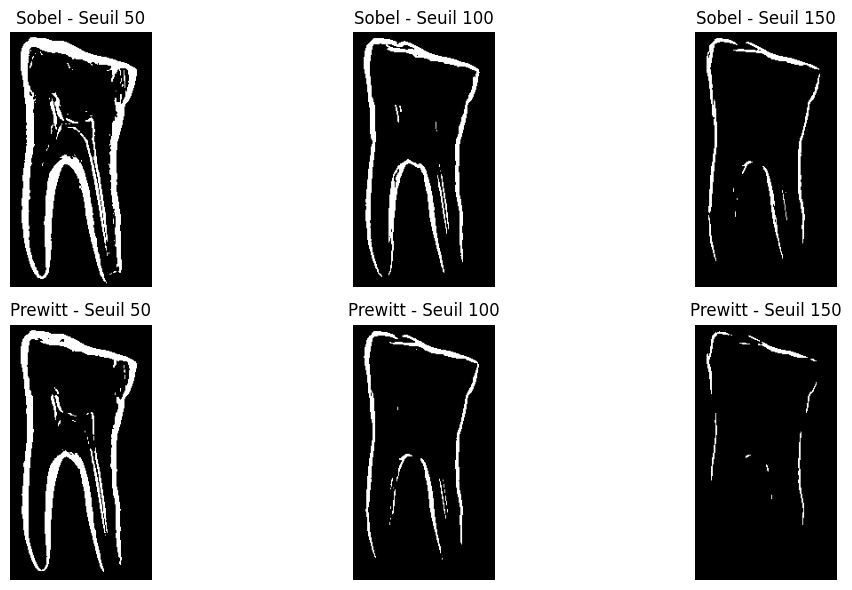

In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Charger l'image
chemin_image = '/content/dent.PNG'
image = Image.open(chemin_image)
image_gris = image.convert('L')  # Convertir en niveaux de gris

# Convertir l'image en tableau NumPy
image_array = np.array(image_gris)

# Noyaux Sobel et Prewitt
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

# Fonction pour la convolution 2D
def convolve2d(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output = np.zeros((img_height, img_width))

    for i in range(img_height - kernel_height + 1):
        for j in range(img_width - kernel_width + 1):
            output[i, j] = np.sum(image[i:i + kernel_height, j:j + kernel_width] * kernel)

    return output

# Calcul des gradients pour les opérateurs Sobel et Prewitt
gradient_sobel_x = convolve2d(image_array, sobel_x)
gradient_sobel_y = convolve2d(image_array, sobel_y)
gradient_sobel = np.sqrt(gradient_sobel_x ** 2 + gradient_sobel_y ** 2)

gradient_prewitt_x = convolve2d(image_array, prewitt_x)
gradient_prewitt_y = convolve2d(image_array, prewitt_y)
gradient_prewitt = np.sqrt(gradient_prewitt_x ** 2 + gradient_prewitt_y ** 2)

# Liste de seuils à tester
seuils_sobel = [50, 100, 150]
seuils_prewitt = [50, 100, 150]

plt.figure(figsize=(12, 6))

# Affichage et sauvegarde des images avec différents seuils pour Sobel
for i, seuil in enumerate(seuils_sobel, 1):
    edges_sobel_seuil = np.where(gradient_sobel > seuil, 255, 0)
    plt.subplot(2, len(seuils_sobel), i)
    plt.title(f'Sobel - Seuil {seuil}')
    plt.imshow(edges_sobel_seuil, cmap='gray')
    plt.axis('off')
    plt.imsave(f'/content/sobel_seuil_{seuil}.png', edges_sobel_seuil, cmap='gray')

# Affichage et sauvegarde des images avec différents seuils pour Prewitt
for i, seuil in enumerate(seuils_prewitt, 1):
    edges_prewitt_seuil = np.where(gradient_prewitt > seuil, 255, 0)
    plt.subplot(2, len(seuils_prewitt), i + len(seuils_sobel))
    plt.title(f'Prewitt - Seuil {seuil}')
    plt.imshow(edges_prewitt_seuil, cmap='gray')
    plt.axis('off')
    plt.imsave(f'/content/prewitt_seuil_{seuil}.png', edges_prewitt_seuil, cmap='gray')

plt.tight_layout()
plt.show()


### Canny

Le script applique l'algorithme de détection de contours de Canny à une image en niveaux de gris. Il utilise les opérateurs de Sobel pour calculer les gradients dans les directions x et y, détermine la magnitude du gradient, puis applique des seuils bas et hauts pour identifier les contours dans l'image. Enfin, il affiche l'image originale et les contours détectés par l'algorithme de Canny.

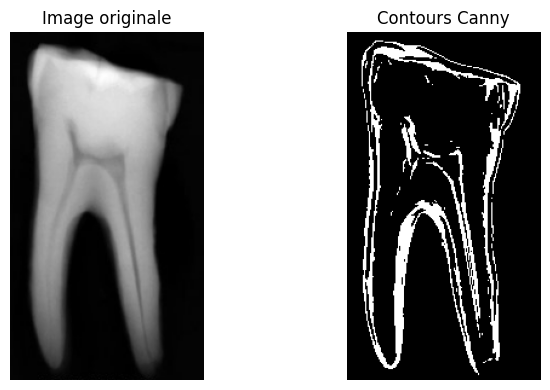

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Charger l'image
chemin_image = '/content/dent.PNG'
image = Image.open(chemin_image)
image_gris = image.convert('L')  # Convertir en niveaux de gris

# Convertir l'image en tableau NumPy
image_array = np.array(image_gris)

# Définition des noyaux Sobel pour le calcul des gradients
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Fonction pour la convolution 2D
def convolve2d(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output = np.zeros((img_height, img_width))

    for i in range(img_height - kernel_height + 1):
        for j in range(img_width - kernel_width + 1):
            output[i, j] = np.sum(image[i:i + kernel_height, j:j + kernel_width] * kernel)

    return output

# Calcul des gradients avec les noyaux Sobel
gradient_x = convolve2d(image_array, sobel_x)
gradient_y = convolve2d(image_array, sobel_y)

# Calcul du gradient de magnitude
gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)

# Seuils pour la détection des contours
seuil_bas = 50
seuil_haut = 150

# Application des seuils pour détecter les bords
edges = np.zeros_like(gradient_magnitude)
edges[(gradient_magnitude >= seuil_bas) & (gradient_magnitude <= seuil_haut)] = 255

# Affichage du résultat
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title('Image originale')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('Contours Canny')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Chaque paire de seuils spécifiée crée une image des contours en fonction des valeurs de gradient tombant entre ces seuils. Les résultats sont affichés et enregistrés individuellement, représentant les contours détectés avec différents seuils dans l'image d'origine.

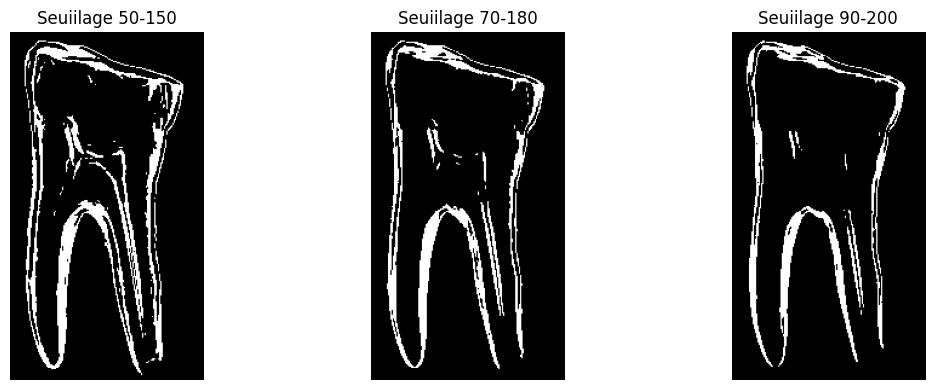

In [23]:
#POur canny
#4.	Appliquer des seuils et observer les résultats en comparant les bords.
#5.	Sauvegarder les images résultats avec différents seuils.




import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Charger l'image
chemin_image = '/content/dent.PNG'
image = Image.open(chemin_image)
image_gris = image.convert('L')  # Convertir en niveaux de gris

# Convertir l'image en tableau NumPy
image_array = np.array(image_gris)

# Définition des noyaux Sobel pour le calcul des gradients
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Fonction pour la convolution 2D
def convolve2d(image, kernel):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output = np.zeros((img_height, img_width))

    for i in range(img_height - kernel_height + 1):
        for j in range(img_width - kernel_width + 1):
            output[i, j] = np.sum(image[i:i + kernel_height, j:j + kernel_width] * kernel)

    return output

# Calcul des gradients avec les noyaux Sobel
gradient_x = convolve2d(image_array, sobel_x)
gradient_y = convolve2d(image_array, sobel_y)

# Calcul du gradient de magnitude
gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)

# Seuils pour la détection des contours
seuils = [(50, 150), (70, 180), (90, 200)]

# Application des seuils pour détecter les bords
plt.figure(figsize=(12, 4))

for i, (seuil_bas, seuil_haut) in enumerate(seuils, 1):
    edges = np.zeros_like(gradient_magnitude)
    edges[(gradient_magnitude >= seuil_bas) & (gradient_magnitude <= seuil_haut)] = 255


    plt.subplot(1, len(seuils), i)
    plt.title(f'Seuiilage {seuil_bas}-{seuil_haut}')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    # Sauvegarde de l'image avec le seuillage actuel
    image_result = Image.fromarray(edges.astype(np.uint8))
    image_result.save(f"resultat_seuil_{seuil_bas}_{seuil_haut}.png")
plt.tight_layout()
plt.show()


### **6.	Eroder et dilater les contours détectés et observer la différence.**


1	Dans ce script, j'ai créé des fonctions pour l'érosion et la dilatation d'une image en utilisant des noyaux prédéfinis. Ensuite, j'ai appliqué ces opérations d'érosion et de dilatation aux contours détectés à l'aide de l'algorithme de détection de contours de Canny. Les résultats affichent l'image des contours d'origine, ainsi que les images des contours après érosion et dilatation. Cela permet de visualiser et de comparer les effets de ces opérations sur les contours détectés dans l'image.

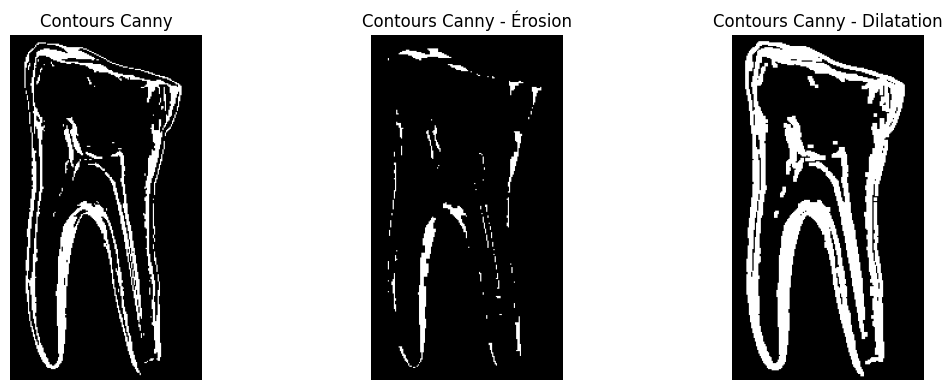

In [36]:
def erosion(image, kernel):
    output = np.zeros_like(image)
    kh, kw = kernel.shape
    pad_height = kh // 2
    pad_width = kw // 2
    padded_img = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    for i in range(pad_height, image.shape[0] + pad_height):
        for j in range(pad_width, image.shape[1] + pad_width):
            if np.min(padded_img[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1] * kernel) > 0:
                output[i - pad_height, j - pad_width] = 1

    return output

def dilatation(image, kernel):
    output = np.zeros_like(image)
    kh, kw = kernel.shape
    pad_height = kh // 2
    pad_width = kw // 2
    padded_img = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    for i in range(pad_height, image.shape[0] + pad_height):
        for j in range(pad_width, image.shape[1] + pad_width):
            if np.max(padded_img[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1] * kernel) > 0:
                output[i - pad_height, j - pad_width] = 1

    return output

# Calcul des gradients pour les opérateurs Sobel et Prewitt (déjà définis dans votre code)

# ... Votre code précédent pour Sobel et Prewitt ...

# Appliquer érosion et dilatation sur les résultats de Sobel et Prewitt
# Appliquer érosion et dilatation sur les contours Canny
kernel_erosion = np.ones((3, 3))
kernel_dilatation = np.ones((3, 3))

edges_eroded = erosion(edges, kernel_erosion)
edges_dilated = dilatation(edges, kernel_dilatation)

# Affichage des résultats de Canny, de l'érosion et de la dilatation
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.title('Contours Canny')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Contours Canny - Érosion')
plt.imshow(edges_eroded, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('Contours Canny - Dilatation')
plt.imshow(edges_dilated, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()